In [51]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt 

In [52]:
src_fp = 'glc1-a/nc/glc1-a_dx_50_NT_1000_dt_1.0_MB_-1.225_OFF_Tma_-9.0_wlimit_*_prog_gridded.nc'
src_ds = xr.open_mfdataset(src_fp)

src_ds['Vol'] = src_ds.height.isel(coord_2=-1).integrate("coord_1") /\
                src_ds.height.isel(coord_2=-1,t=0).integrate("coord_1")

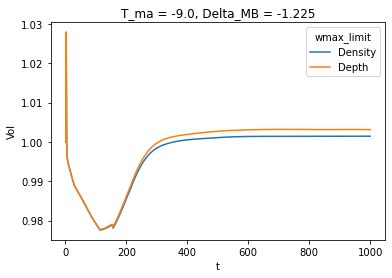

In [53]:
src_ds['Vol'].plot(hue='wmax_limit')

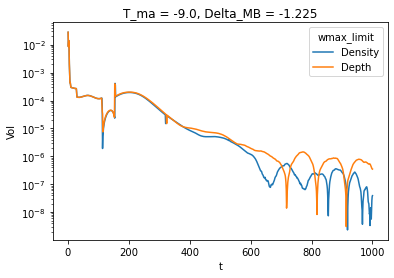

In [55]:
np.abs(src_ds['Vol'].isel(t=slice(0,None)).differentiate('t')).plot(hue='wmax_limit')
plt.yscale('log')

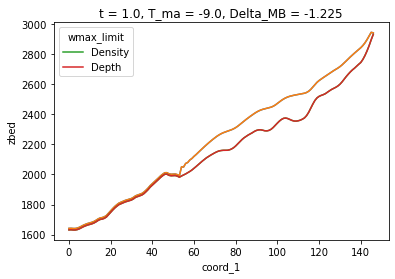

In [43]:
src_ds.Z.isel(coord_2=-1, t=-1).plot(hue='wmax_limit')
src_ds.zbed.isel(coord_2=-1, t=0).plot(hue='wmax_limit')

/Users/andrewnolan/anaconda3/envs/thermal/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  This is separate from the ipykernel package so we can avoid doing imports until


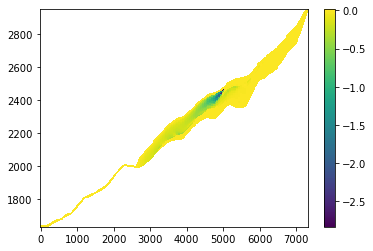

In [62]:
plt.pcolormesh(src_ds.X, 
               src_ds.Z.isel(t=-1, wmax_limit=0), 
               src_ds['temperature'].diff('wmax_limit').isel(wmax_limit=-1, Delta_MB=0, T_ma=0, t=-1)
              )
plt.colorbar()

plt.savefig('test.pdf', facecolor='w', bbox_inches='tight')

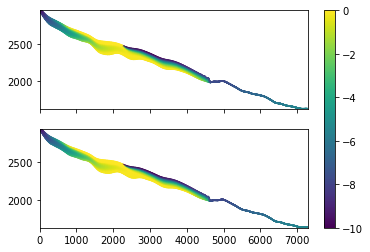

In [82]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True) 


norm = plt.Normalize(-10, 0.0)

im = ax[0].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['temperature'].isel(wmax_limit=-1, Delta_MB=0, T_ma=0, t=-1),
                      shading='gouraud',
                      norm=norm
                     )

im = ax[1].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['temperature'].isel(wmax_limit=0, Delta_MB=0, T_ma=0, t=-1),
                      shading='gouraud',
                      norm=norm
                     )
 
plt.colorbar(im, ax=ax)

plt.savefig('test.pdf', facecolor='w', bbox_inches='tight')

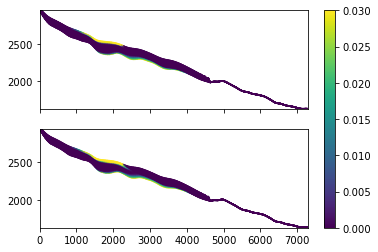

In [81]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True) 

norm = plt.Normalize(0.0,0.03)

im = ax[0].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['water content'].isel(wmax_limit=-1, Delta_MB=0, T_ma=0, t=-1),
                      shading='gouraud',
                      norm=norm
                     )

im = ax[1].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['water content'].isel(wmax_limit=0, Delta_MB=0, T_ma=0, t=-1),
                      shading='gouraud',
                      norm=norm
                     )
plt.colorbar(im, ax=ax)

plt.savefig('test.pdf', facecolor='w', bbox_inches='tight')

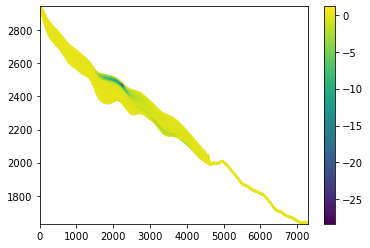

In [87]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True) 

# norm = plt.Normalize(0.0,0.03)

im = ax.pcolormesh(src_ds.X[:, ::-1], 
                   src_ds.Z.isel(t=-1, wmax_limit=0), 
                   (src_ds['enthalpy_h'].isel(wmax_limit=-1, Delta_MB=0, T_ma=0, t=-1) - \
                   src_ds['enthalpy_h'].isel(wmax_limit=0, Delta_MB=0, T_ma=0, t=-1)) / 1e3,
                   shading='gouraud'
                     )

plt.colorbar(im, ax=ax)

# plt.savefig('test.pdf', facecolor='w', bbox_inches='tight')